<a href="https://colab.research.google.com/github/declan-healy/x-ray-fluorescence/blob/main/Experiment_A2_X_ray_fluorescence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
%cd /content
!rm -rf x-ray-fluorescence
!git clone https://git_token@github.com/declan-healy/x-ray-fluorescence.git
%cd /content/x-ray-fluorescence/
!git pull

/content
Cloning into 'x-ray-fluorescence'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 36 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.
/content/x-ray-fluorescence
Already up to date.


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [132]:
#x axis
x_axis = np.linspace(1,512,512)

#read in week 1 data
w1_df = pd.read_csv("4 values.txt",  encoding = "ISO-8859-1", delimiter = "\t", skiprows = 4)
w1_df.iloc[:,0] = x_axis
#galvinised steel
w1_n1 = w1_df.iloc[:,1]
#elements
w1_n2 = w1_df.iloc[:,2]
w1_n3 = w1_df.iloc[:,3]
w1_n4 = w1_df.iloc[:,4]

#read in week 2 data
w2_df = pd.read_csv("50 Euro cent (text).txt",  encoding = "ISO-8859-1", delimiter = "\t", skiprows = 4)
w2_df.iloc[:,0] = x_axis
#make count adjustment due to different machines used
#w2_df.iloc[:,0] = x_axis + 19
#50c (euro)
w2_n1 = w2_df.iloc[:,1]
#1 dime (US)
w2_n2 = w2_df.iloc[:,2]
#£1 (UK)
w2_n3 = w2_df.iloc[:,3]
#Galvinised steel sample
w2_n4 = w2_df.iloc[:,4]
#2p (UK)
w2_n5 = w2_df.iloc[:,5]
#Rupee (Indian)
w2_n6 = w2_df.iloc[:,6]
#alloy number 4
w2_n7 = w2_df.iloc[:,7]
#alloy number 3
w2_n8 = w2_df.iloc[:,8]

w2_n9 = w2_df.iloc[:,9]
w2_n10 = w2_df.iloc[:,10]
w2_n11 = w2_df.iloc[:,11]
w2_n12 = w2_df.iloc[:,12]

#w2_df_callibration = pd.read_csv("CONTROL `1.txt",  encoding = "ISO-8859-1", delimiter = "\t", skiprows = 4)
#w2_n0 = w2_df_callibration.iloc[:,1]

#read in week 2 spectrum measurement
w2_spectrum = pd.read_csv("Meetal thingy values txt.txt", encoding = "ISO-8859-1", delimiter = "\t", skiprows = 4)

#

w2_n13 = w2_spectrum.iloc[:,2]

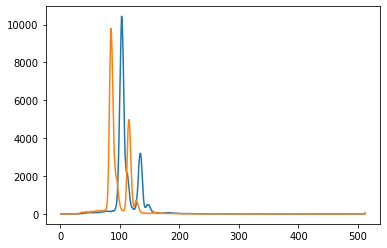

In [133]:
#galvinised steel calibration
#week 1
plt.plot(x_axis,w1_n1)
#week 2
plt.plot(x_axis,w2_n4)


103.0


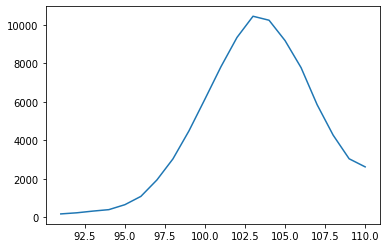

In [134]:
peak = range(90,110)
plt.plot(w1_df.iloc[peak,0],w1_df.iloc[peak,1])
w1_peak1 = w1_df.iloc[w1_df.iloc[peak,1].idxmax(),0]
print(w1_peak1)

135.0


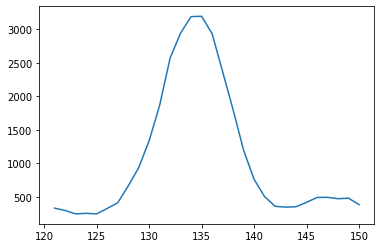

In [135]:
peak = range(120,150)
plt.plot(w1_df.iloc[peak,0], w1_df.iloc[peak,1])
w1_peak2 = w1_df.iloc[w1_df.iloc[peak,1].idxmax(),0]
print(w1_peak2)

85.0


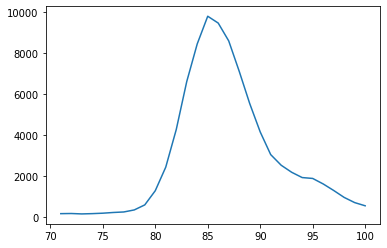

In [136]:
peak = range(70,100)
plt.plot(w2_df.iloc[peak,0], w2_df.iloc[peak,4])
w2_peak1 = w2_df.iloc[w2_df.iloc[peak,4].idxmax(),0]
print(w2_peak1)

115.0


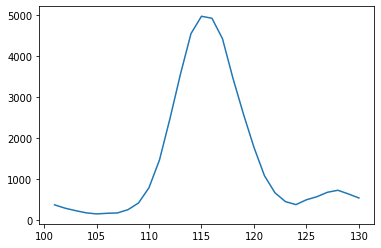

In [137]:
peak = range(100,130)
plt.plot(w2_df.iloc[peak,0], w2_df.iloc[peak,4])
w2_peak2 = w2_df.iloc[w2_df.iloc[peak,4].idxmax(),0]
print(w2_peak2)

In [145]:
#week 1 calibration equations
m,c = sym.symbols('m, c')
eq1 = sym.Eq(m*w1_peak1+c,6.4)
eq2 = sym.Eq(m*w1_peak2+c,8.631)
result = sym.solve([eq1,eq2],(m,c))
w1_m = result.get(m)
w1_c = result.get(c)
print(w1_m)
print(w1_c)

0.0697187500000000
-0.781031250000000


In [147]:
#week 2 calibration equations
m,c = sym.symbols('m, c')
eq1 = sym.Eq(m*w2_peak1+c,6.4)
eq2 = sym.Eq(m*w2_peak2+c,8.631)
result = sym.solve([eq1,eq2],(m,c))
w2_m = result.get(m)
w2_c = result.get(c)
print(w2_m)
print(w2_c)

0.0743666666666667
0.0788333333333333


In [148]:
x_axis_w1 = x_axis * w1_m + w1_c
w1_df.iloc[:,0] = x_axis_w1
x_axis_w2 = x_axis * w2_m + w2_c
w2_df.iloc[:,0] = x_axis_w2

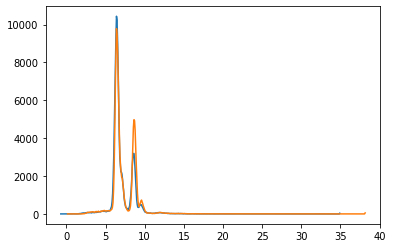

In [156]:
#galvinised steel calibration
#week 1
plt.plot(w1_df.iloc[:,0],w1_df.iloc[:,1])
#week 2
plt.plot(w2_df.iloc[:,0],w2_df.iloc[:,4])

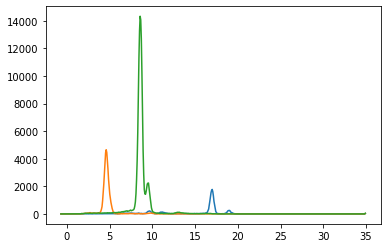

In [157]:
#elements (week 1)
plt.plot(x_axis_w1,w1_n2)
plt.plot(x_axis_w1,w1_n3)
plt.plot(x_axis_w1,w1_n4)


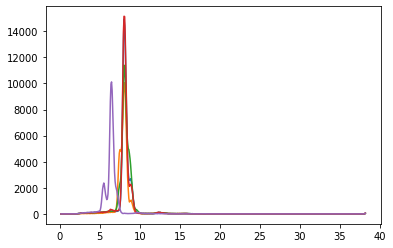

In [158]:
#coins (week 2)
plt.plot(w2_df.iloc[:,0],w2_n1)
plt.plot(w2_df.iloc[:,0],w2_n2)
plt.plot(w2_df.iloc[:,0],w2_n3)
plt.plot(w2_df.iloc[:,0],w2_n5)
plt.plot(w2_df.iloc[:,0],w2_n6)

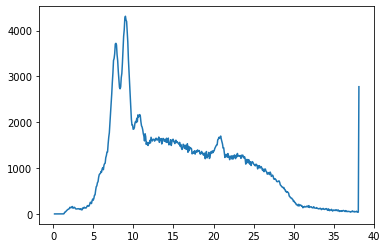

In [159]:
#spectrum (week 2)
plt.plot(w2_df.iloc[:,0],w2_n13)